# test_feature_extraction

Import the neccesary libraries

In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

Look for the datasets the belong in the test group and combined them into a data frame

In [2]:
folder_path = 'EyeT'

file_pattern = os.path.join(folder_path, '*dataset_III*.csv')

files = glob.glob(file_pattern)

dfs = []

for file in files:
    df = pd.read_csv(file, low_memory=False)
    dfs.append(df)

result_df = pd.concat(dfs, ignore_index=True)

Function to plot the percentage of NAs values

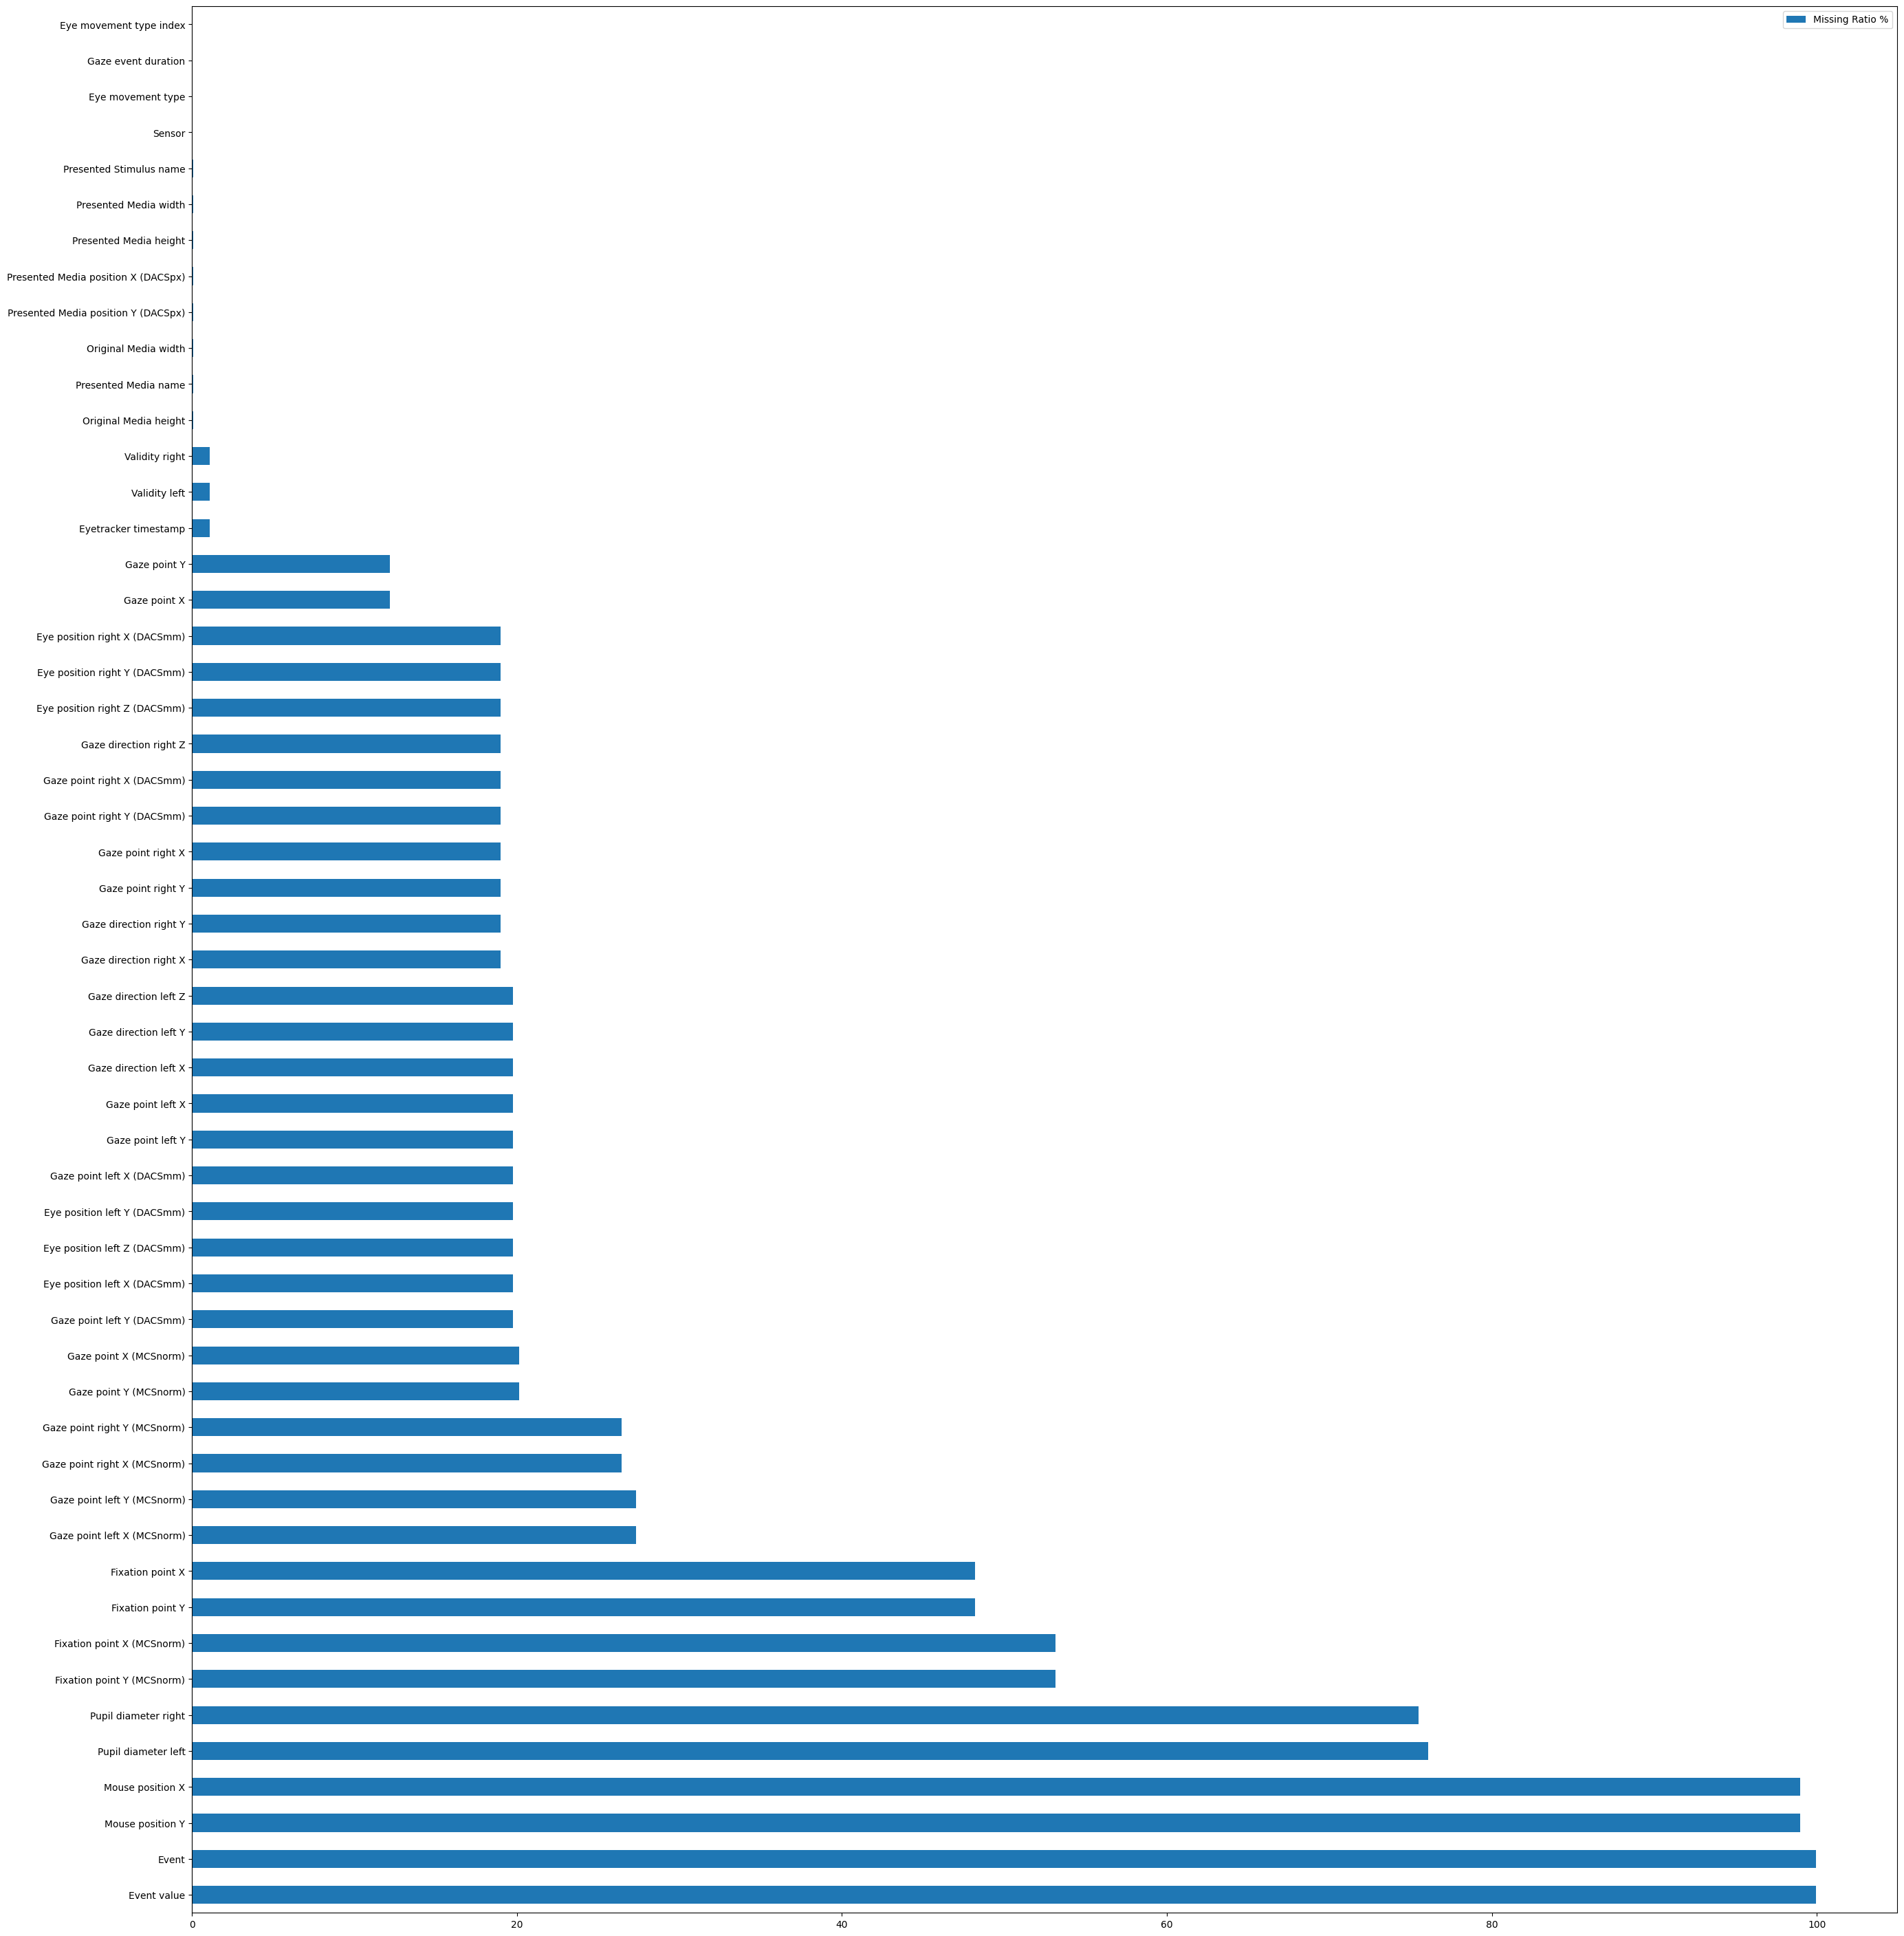

In [3]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize=(32,36))
        plt.show()
    else:
        print('No NAs found')

plot_nas(result_df)

In [4]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776742 entries, 0 to 3776741
Data columns (total 71 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           int64  
 1   Recording timestamp                  int64  
 2   Computer timestamp                   int64  
 3   Sensor                               object 
 4   Project name                         object 
 5   Export date                          object 
 6   Participant name                     object 
 7   Recording name                       object 
 8   Recording date                       object 
 9   Recording date UTC                   object 
 10  Recording start time                 object 
 11  Recording start time UTC             object 
 12  Recording duration                   int64  
 13  Timeline name                        object 
 14  Recording Fixation filter name       object 
 15  Recording software version      

A for to look for all the unique values in each column

In [5]:
for col in result_df:
    print(col, result_df[col].unique())

Unnamed: 0 [ 93678  93679  93680 ... 529895 529896 529897]
Recording timestamp [ 7183002  7186970  7191787 ... 49075887 49084174 49103212]
Computer timestamp [ 188368002977  188368006945  188368011762 ... 4233908688788 4233908697075
 4233908716113]
Sensor [nan 'Eye Tracker' 'Mouse']
Project name ['Participant0019' 'Participant0027' 'Test group experiment' 'Project0057'
 'Participant0015' 'Participant0037' 'Participant0047' 'Participant0031'
 'Participant0013' 'Participant0041' 'Participant0021' 'Participant0051'
 'Participant0033' 'Participant0053' 'Participant0023' 'Participant0043'
 'Participant0045' 'Participant0059' 'Participant0017' 'Participant0035'
 'Participant0029' 'Participant0049' 'Participant0060' 'Participants0039'
 'Participant0025']
Export date ['05.02.2021' '17.02.2021' '06.10.2020' '20.09.2021' '20.10.2020'
 '03.02.2021' '24.09.2020' '01.10.2020' '29.10.2020' '09.03.2021'
 '16.09.2021' '23.02.2021' '25.11.2020' '18.03.2021' '08.02.2021'
 '03.03.2021' '10.02.2021' '23.0

Recording duration [146435  61795  54472  30766  66722  67820  58947  40093  43548 112853
 154116 109036 115758  35443  37554 154509  65697  89755 106892  54123
  80471  50196 119610  63189  34968  74121 140672 179552  44211  76373
  33548  72090  73078 112992 143867 135409 120768  88597  68704 108508
 164059 155150 136715  42668 128686 147904 233360 124543  79198  72370
  71530  57257  73900  37617 146712  25777  23409  65001  37324  24549
  48061 101945  83579 126407  74360 113432 117886 185018 226432 147774
  79646  64593 172051  54512 100222  78262  44743  66127  68291 151298
 103283 100503 154541 215409 114115  54563  76853 113154  93216  25355
  27388  25227  53204 176150 137395  52534 187644 196329 122934 149504
 108463  32429  56833  46076  44130  60876 197801 209613 211807  42051
  69760  67705  75044 159747  48274  52558  26683 132520  39135  43032
 146870  46688  65349 139761 189943 132714  81914 103367  60334 155104
 109216 148904 204451  55621 159684  49944  45908  55470 1

Validity right [nan 'Valid' 'Invalid']
Eye position left X (DACSmm) [nan '235,4' '235,5' ... '326,0' '327,5' '147,7']
Eye position left Y (DACSmm) [nan '93,2' '93,1' ... '-82,4' '-83,2' '160,5']
Eye position left Z (DACSmm) [nan '642,4' '642,5' ... '852,4' '369,0' '367,6']
Eye position right X (DACSmm) [nan '300,5' '300,7' ... '209,7' '210,4' '213,2']
Eye position right Y (DACSmm) [nan '101,8' '101,9' ... '156,2' '155,9' '153,4']
Eye position right Z (DACSmm) [nan '630,5' '630,3' ... '365,9' '366,4' '370,5']
Gaze point left X (DACSmm) [nan '424,1' '421,7' ... '-33,3' '-30,3' '458,6']
Gaze point left Y (DACSmm) [nan '249,5' '249,6' ... '639,2' '636,9' '626,6']
Gaze point right X (DACSmm) [nan '433,7' '432,2' ... '-15,1' '596,6' '586,3']
Gaze point right Y (DACSmm) [nan '266,3' '267,7' ... '600,8' '581,2' '363,8']
Gaze point X (MCSnorm) [nan '0,9053' '0,9005' ... '0,9679' '0,9635' '0,9666']
Gaze point Y (MCSnorm) [nan '0,8727' '0,8750' ... '0,9936' '0,9757' '0,9915']
Gaze point left X (M

Drop the not neccesary columns

In [6]:
result_df = result_df.drop(['Unnamed: 0','Recording timestamp','Computer timestamp','Sensor','Project name','Export date',
              'Recording date','Recording date UTC','Recording start time','Recording start time UTC',
              'Recording duration','Timeline name','Recording Fixation filter name','Recording software version',
              'Recording resolution height','Recording resolution width','Recording monitor latency',
              'Eyetracker timestamp','Event','Event value','Presented Stimulus name','Presented Media name',
              'Presented Media width','Presented Media height','Presented Media position X (DACSpx)',
              'Presented Media position Y (DACSpx)','Original Media width','Original Media height',
              'Mouse position X','Mouse position Y','Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y',
              'Gaze point right X','Gaze point right Y','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)',
              'Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Fixation point X','Fixation point Y','Validity left',
              'Validity right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)',
              'Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)',
              'Eye movement type','Eye movement type index'],axis=1)

Decided to keep this columns to then see how each of them looks like in the histogram

In [7]:
result_df

,Participant name,Recording name,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Gaze event duration,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
0,Participant0019,Recording7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,"0,8962","0,8748"
1,Participant0019,Recording7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,"0,8962","0,8748"
2,Participant0019,Recording7,"0,27447","0,22732","-0,93434","0,20032","0,24741","-0,94798","3,86","3,71","0,9053","0,8727","0,8935","0,8443","0,9171","0,9011",233.0,"0,8962","0,8748"
3,Participant0019,Recording7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,"0,8962","0,8748"
4,Participant0019,Recording7,"0,27107","0,22761","-0,93526","0,19786","0,24937","-0,94798",NaN,NaN,"0,9005","0,8750","0,8876","0,8444","0,9134","0,9056",233.0,"0,8962","0,8748"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776737,Participant0045,Recording3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,"0,6053","0,3875"
3776738,Participant0045,Recording3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,"0,6053","0,3875"
3776739,Participant0045,Recording3,"0,10341","0,10419","-0,98917","0,11326","0,08825","-0,98964",NaN,NaN,"0,6159","0,3799","0,5320","0,3988","0,6999","0,3610",75.0,"0,6053","0,3875"
3776740,Participant0045,Recording3,"0,10268","0,10612","-0,98904",NaN,NaN,NaN,"2,98",NaN,"0,5312","0,4024","0,5312","0,4024",NaN,NaN,75.0,"0,6053","0,3875"


Replace commas for dots

In [8]:
result_df['Gaze point X (MCSnorm)'] = result_df['Gaze point X (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Gaze point Y (MCSnorm)'] = result_df['Gaze point Y (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Pupil diameter left'] = result_df['Pupil diameter left'].str.replace(',', '.').astype(float)
result_df['Pupil diameter right'] = result_df['Pupil diameter right'].str.replace(',', '.').astype(float)
result_df['Gaze direction left X'] = result_df['Gaze direction left X'].str.replace(',', '.').astype(float)
result_df['Gaze direction left Y'] = result_df['Gaze direction left Y'].str.replace(',', '.').astype(float)
result_df['Gaze direction left Z'] = result_df['Gaze direction left Z'].str.replace(',', '.').astype(float)
result_df['Gaze direction right X'] = result_df['Gaze direction right X'].str.replace(',', '.').astype(float)
result_df['Gaze direction right Y'] = result_df['Gaze direction right Y'].str.replace(',', '.').astype(float)
result_df['Gaze direction right Z'] = result_df['Gaze direction right Z'].str.replace(',', '.').astype(float)
result_df['Gaze point left X (MCSnorm)'] = result_df['Gaze point left X (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Gaze point left Y (MCSnorm)'] = result_df['Gaze point left Y (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Gaze point right X (MCSnorm)'] = result_df['Gaze point right X (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Gaze point right Y (MCSnorm)'] = result_df['Gaze point right Y (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Fixation point X (MCSnorm)'] = result_df['Fixation point X (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Fixation point Y (MCSnorm)'] = result_df['Fixation point Y (MCSnorm)'].str.replace(',', '.').astype(float)

Convert 'Participate name' and 'Recording name' into integers

In [9]:
result_df['Participant name'] = result_df['Participant name'].str.replace('Participant00','').astype(int)

In [10]:
result_df.describe()

,Participant name,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Gaze event duration,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
count,3.776742e+06,3.031030e+06,3.031030e+06,3.031030e+06,3.058745e+06,3.058745e+06,3.058745e+06,903812.000000,926345.000000,3.016015e+06,3.016015e+06,2.743985e+06,2.743985e+06,2.778584e+06,2.778584e+06,3.776108e+06,1.769912e+06,1.769912e+06
mean,2.170995e+01,1.267897e-02,9.193745e-02,-9.743365e-01,-3.671690e-02,8.834421e-02,-9.747013e-01,3.068560,3.082392,4.589940e-01,4.748705e-01,4.160989e-01,4.799266e-01,5.016892e-01,4.709873e-01,2.243196e+02,4.566110e-01,4.805862e-01
std,1.837139e+01,1.361441e-01,1.510228e-01,2.668823e-02,1.333792e-01,1.494525e-01,2.605333e-02,0.439129,0.424808,1.825260e-01,2.412284e-01,1.825971e-01,2.425315e-01,1.810397e-01,2.368555e-01,5.545135e+02,1.779952e-01,2.404475e-01
min,1.000000e+00,-5.626500e-01,-4.372500e-01,-1.000000e+00,-5.823200e-01,-4.269300e-01,-1.000000e+00,1.050000,1.140000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-04,0.000000e+00,8.000000e+00,1.000000e-04,0.000000e+00
25%,5.000000e+00,-6.504000e-02,-1.567000e-02,-9.937900e-01,-1.101500e-01,-1.456000e-02,-9.938800e-01,2.850000,2.840000,3.551000e-01,2.931000e-01,3.128000e-01,2.954000e-01,3.972000e-01,2.984000e-01,2.500000e+01,3.703000e-01,3.020000e-01
50%,1.700000e+01,9.090000e-03,9.613000e-02,-9.830300e-01,-3.820000e-02,9.208000e-02,-9.831200e-01,3.020000,3.040000,4.643000e-01,4.775000e-01,4.194000e-01,4.848000e-01,5.100000e-01,4.718000e-01,1.080000e+02,4.621000e-01,4.772000e-01
75%,3.700000e+01,9.364000e-02,1.996400e-01,-9.635000e-01,4.413000e-02,1.965400e-01,-9.640800e-01,3.220000,3.280000,5.506000e-01,6.733000e-01,5.107000e-01,6.756000e-01,6.077000e-01,6.636000e-01,2.500000e+02,5.363000e-01,6.862000e-01
max,5.900000e+01,6.413400e-01,8.052800e-01,-5.714400e-01,6.239600e-01,7.915000e-01,-5.879500e-01,7.510000,6.750000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.428300e+04,9.993000e-01,1.000000e+00


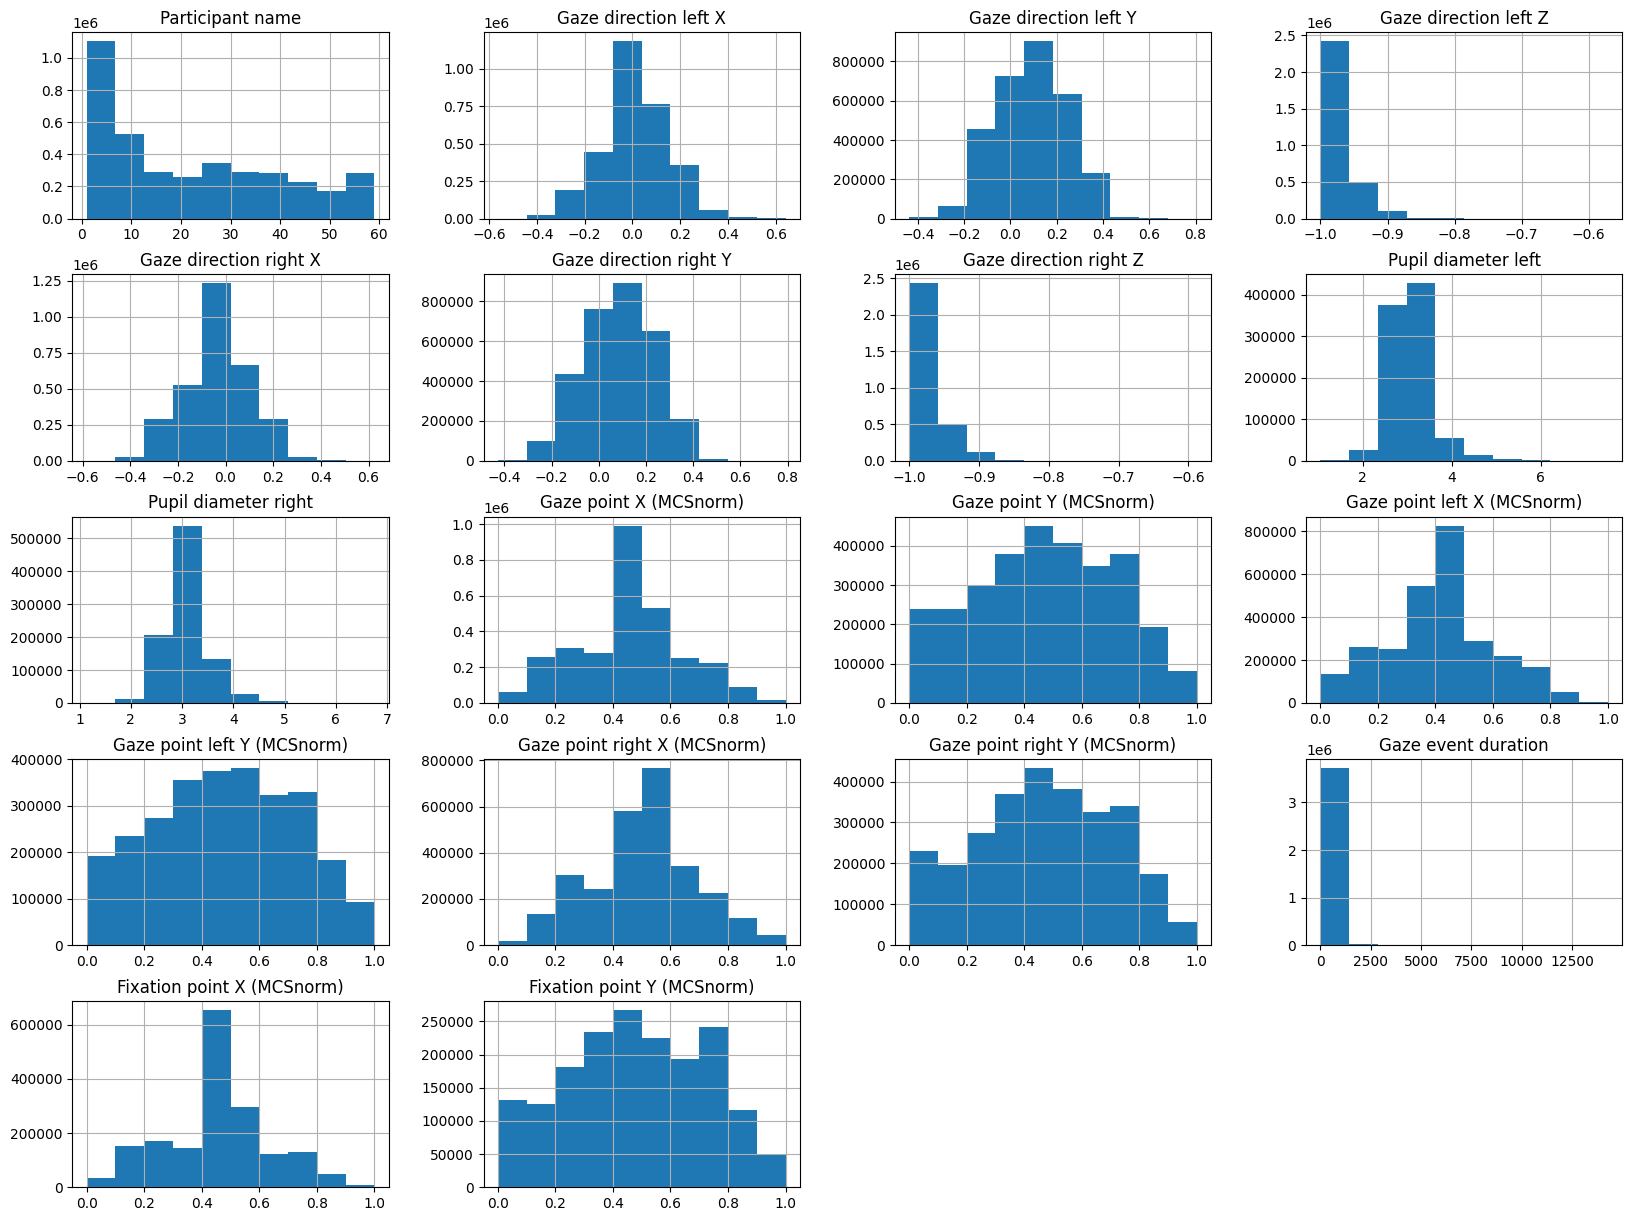

In [11]:
result_df.hist(figsize=(20, 15))
plt.show()

After making the histogram we have decided that we are going to keep the columns for the gaze point that are already normalized and in the table explaining the columns we can see that gaze point x is a combination of left and right. Also I'll be dropping any duplicate rows.

In [18]:
new_df = result_df[['Participant name','Recording name','Pupil diameter left','Pupil diameter right',
                      'Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze event duration']].drop_duplicates()

Now that we have selected our features we are going to add the score of the questionaires

In [19]:
ques = pd.read_csv('Questionnaires/Questionnaire_datasetIB.csv', encoding='ISO-8859-1')

Select 'Participant nr' and 'Total Score extended"

In [20]:
new_ques = ques[['Participant nr','Total Score extended']]

Merge the data frames

In [21]:
merged_df = new_df.merge(new_ques, how='left', left_on='Participant name', right_on='Participant nr')

# drop the 'Participant nr' column from the merged dataframe
merged_df = merged_df.drop(['Participant nr'], axis=1).copy()

Group the rows so that each row will be the participant and each of the recording row

In [27]:
grouped = merged_df.groupby(['Participant name','Recording name'])

# Get the mean for each feature in each of the trials
final_df = grouped.mean().reset_index().drop(['Recording name'],axis=1)
final_df

,Participant name,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze event duration,Total Score extended
0,1,3.076144,3.050937,0.554093,0.336420,131.204938,137.0
1,1,2.997684,3.008923,0.506665,0.386806,128.974849,137.0
2,1,3.079606,3.098868,0.495546,0.436487,125.744186,137.0
3,1,3.037665,3.060626,0.496100,0.438217,131.585847,137.0
4,1,3.022055,3.059617,0.516138,0.446003,139.166059,137.0
...,...,...,...,...,...,...,...
235,59,2.995971,2.791593,0.422020,0.531527,156.684050,136.0
236,59,2.919149,2.762577,0.411769,0.566484,184.007102,136.0
237,59,3.042267,2.892255,0.379017,0.591160,163.318096,136.0
238,59,2.938584,2.797441,0.382506,0.541158,135.371277,136.0


In [30]:
final_df['Total Score extended'].min()

97.0

In [31]:
bins = [80, 100, 120,140, 160]  # define the boundaries of the ranges
labels = [0, 1, 2, 3]  # define the labels for each range
final_df['Total Score extended'] = pd.cut(final_df['Total Score extended'], bins=bins, labels=labels)  # apply the pd.cut() function

In [32]:
final_df

,Participant name,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze event duration,Total Score extended
0,1,3.076144,3.050937,0.554093,0.336420,131.204938,2
1,1,2.997684,3.008923,0.506665,0.386806,128.974849,2
2,1,3.079606,3.098868,0.495546,0.436487,125.744186,2
3,1,3.037665,3.060626,0.496100,0.438217,131.585847,2
4,1,3.022055,3.059617,0.516138,0.446003,139.166059,2
...,...,...,...,...,...,...,...
235,59,2.995971,2.791593,0.422020,0.531527,156.684050,2
236,59,2.919149,2.762577,0.411769,0.566484,184.007102,2
237,59,3.042267,2.892255,0.379017,0.591160,163.318096,2
238,59,2.938584,2.797441,0.382506,0.541158,135.371277,2


In [33]:
final_df.to_csv('test_final_features.csv', index=False)